In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ast
from sklearn.linear_model import LinearRegression

# RAW CODE AND ANALYSIS

In [4]:
data = pd.read_csv('telegram_messages.csv')
data.head()

,date,text,views,media,reactions,is_forwarded
0,2024-11-15T19:12:59+00:00,"люди, наученные горьким (а для кого-то может и...",129,"{'photos': ['""https://cdn4.telesco.pe/file/sGv...","{'❤️': '12', '🍓': '2'}",False
1,2024-11-23T19:01:50+00:00,мой мир последнюю неделю,89,"{'photos': ['""https://cdn4.telesco.pe/file/QJ9...",{'❤️': '12'},False
2,2024-11-25T14:30:07+00:00,пока солнце выкл греться приходится человеческ...,85,"{'photos': ['""https://cdn4.telesco.pe/file/rXO...","{'🕊': '13', '❤️': '5', '🔥': '2'}",False
3,2024-11-26T14:23:27+00:00,тетки первый курс вспомнили\n*первое видео обя...,82,"{'photos': [], 'documents': [], 'videos': ['ht...","{'❤️': '12', '🕊': '1'}",True
4,2024-11-28T13:31:42+00:00,а пете-то (УЖЕ!!!) семь вчера стукнуло!🎊,107,"{'photos': ['""https://cdn4.telesco.pe/file/ls6...","{'❤️': '12', '🥰': '5', '🔥': '3'}",False


In [5]:
#convert reactions from string to dictionary
def str_to_dict(d):
    if not isinstance(d, str) or not d.strip().startswith('{'):
        return {}
    temp = d[1:-1].split(', ')
    res = {}
    for item in temp:
        if not item or ': ' not in item:
            continue
        pair = item.split(': ', 1)
        if len(pair) != 2:
            continue
        key = pair[0].strip("'\"")
        value = pair[1].strip("'\"")
        res[key] = int(value) if value.isdigit() else value
    return res

data['reactions'] = data['reactions'].apply(str_to_dict)
data.head()                                                                                               

,date,text,views,media,reactions,is_forwarded
0,2024-11-15T19:12:59+00:00,"люди, наученные горьким (а для кого-то может и...",129,"{'photos': ['""https://cdn4.telesco.pe/file/sGv...","{'❤️': 12, '🍓': 2}",False
1,2024-11-23T19:01:50+00:00,мой мир последнюю неделю,89,"{'photos': ['""https://cdn4.telesco.pe/file/QJ9...",{'❤️': 12},False
2,2024-11-25T14:30:07+00:00,пока солнце выкл греться приходится человеческ...,85,"{'photos': ['""https://cdn4.telesco.pe/file/rXO...","{'🕊': 13, '❤️': 5, '🔥': 2}",False
3,2024-11-26T14:23:27+00:00,тетки первый курс вспомнили\n*первое видео обя...,82,"{'photos': [], 'documents': [], 'videos': ['ht...","{'❤️': 12, '🕊': 1}",True
4,2024-11-28T13:31:42+00:00,а пете-то (УЖЕ!!!) семь вчера стукнуло!🎊,107,"{'photos': ['""https://cdn4.telesco.pe/file/ls6...","{'❤️': 12, '🥰': 5, '🔥': 3}",False


In [6]:
data.head()

,date,text,views,media,reactions,is_forwarded
0,2024-11-15T19:12:59+00:00,"люди, наученные горьким (а для кого-то может и...",129,"{'photos': ['""https://cdn4.telesco.pe/file/sGv...","{'❤️': 12, '🍓': 2}",False
1,2024-11-23T19:01:50+00:00,мой мир последнюю неделю,89,"{'photos': ['""https://cdn4.telesco.pe/file/QJ9...",{'❤️': 12},False
2,2024-11-25T14:30:07+00:00,пока солнце выкл греться приходится человеческ...,85,"{'photos': ['""https://cdn4.telesco.pe/file/rXO...","{'🕊': 13, '❤️': 5, '🔥': 2}",False
3,2024-11-26T14:23:27+00:00,тетки первый курс вспомнили\n*первое видео обя...,82,"{'photos': [], 'documents': [], 'videos': ['ht...","{'❤️': 12, '🕊': 1}",True
4,2024-11-28T13:31:42+00:00,а пете-то (УЖЕ!!!) семь вчера стукнуло!🎊,107,"{'photos': ['""https://cdn4.telesco.pe/file/ls6...","{'❤️': 12, '🥰': 5, '🔥': 3}",False


In [7]:
# count total messages and messages per month
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.to_period('M')
total_messages = len(data)
messages_per_month = data.groupby('month').size()
print(f'Total messages: {total_messages}')
print(f'Messages per month: {messages_per_month}')

Total messages: 127
Messages per month: month
2024-11     6
2024-12    13
2025-01    13
2025-02    11
2025-03     9
2025-04    10
2025-05    10
2025-06     7
2025-07    10
2025-08    11
2025-09    19
2025-10     8
Freq: M, dtype: int64


/var/folders/gh/kx1j86g178d7mdd_1dbpwh2c0000gn/T/ipykernel_23964/3871219863.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['month'] = data['date'].dt.to_period('M')


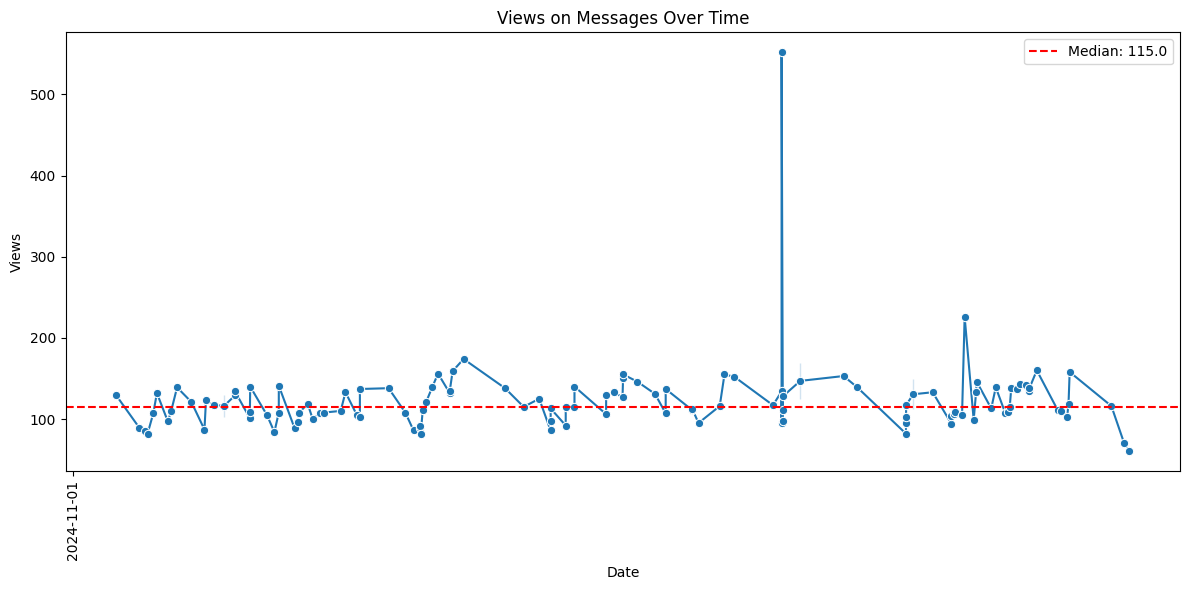

In [8]:
median_views = data['views'].median()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='views', data=data, marker='o')
plt.axhline(median_views, color='red', linestyle='--', label=f'Median: {median_views}')
plt.title('Views on Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(ticks=plt.gca().get_xticks()[::10], rotation=90)
plt.legend()
plt.tight_layout()

In [9]:
# find the message with the highest views
max_views = data['views'].max()
max_views_message = data[data['views'] == max_views]
print(f'Message with highest views:\n{max_views_message}')

Message with highest views:
                        date  \
81 2025-07-03 10:56:57+00:00   

                                                 text  views  \
81  видяшку смотреть ВСЕМ и ОБЯЗАТЕЛЬНО и это НЕ О...    552   

                                            media                  reactions  \
81  {'photos': [], 'documents': [], 'videos': []}  {'❤️': 6, '🍓': 3, '🕊': 1}   

    is_forwarded    month  
81         False  2025-07  


Самый просмотренный пост - это даже не само видео, а текст, который приглашает посмотреть его

In [10]:
# find top 10 messages with highest views
top_10_views = data.nlargest(10, 'views')
print(f'Top 10 messages with highest views:\n{top_10_views}')

Top 10 messages with highest views:
                         date  \
81  2025-07-03 10:56:57+00:00   
102 2025-09-04 15:32:21+00:00   
50  2025-03-15 16:21:15+00:00   
86  2025-07-09 22:01:51+00:00   
118 2025-09-29 13:24:56+00:00   
49  2025-03-11 21:37:24+00:00   
123 2025-10-10 21:42:31+00:00   
46  2025-03-06 20:48:08+00:00   
67  2025-05-09 17:50:15+00:00   
76  2025-06-13 17:51:35+00:00   

                                                  text  views  \
81   видяшку смотреть ВСЕМ и ОБЯЗАТЕЛЬНО и это НЕ О...    552   
102  - ну дай мне шанс…..\n- так ты же женишься\n- ...    226   
50   на последней фотографии мама, приятно вороша в...    174   
86   после вечеринки с бассейном под пошлую молли и...    169   
118                     еще секунда и я….🍭🌸🦷🦄🧠🔮🪷✝️🫧🍬🛼💒    160   
49   всем приятного аппетита\nпосле просмотра этого...    159   
123  второй месяц без шараги, рисовать наконец-то х...    158   
46   кем я хотела стать когда вырасту\n(according t...    156   
67   ну друзья 

In [11]:
all_emojis = {}
for i in data['reactions']:
    if isinstance(i, str) and i.strip().startswith('{'):
        try:
            reactions = eval(i)
            if isinstance(reactions, dict):
                for k, v in reactions.items():
                    all_emojis[k] = all_emojis.get(k, 0) + int(v)
        except Exception:
            continue

all_emojis

{}

In [12]:
# add a column with total reactions
data['total_reactions'] = data['reactions'].apply(lambda x: sum(x.values()) if isinstance(x, dict) else 0)
data.head()

# calculate correlation between views and reactions
correlation = data['views'].corr(data['total_reactions'])
print(f'Correlation between views and total reactions: {correlation}')

Correlation between views and total reactions: 0.02962508150955388


In [13]:
# show top 10 reacted messages
top_10_reactions = data.nlargest(10, 'total_reactions')
print(f'Top 10 messages with highest reactions:\n{top_10_reactions}')

Top 10 messages with highest reactions:
                         date  \
99  2025-08-31 21:43:19+00:00   
102 2025-09-04 15:32:21+00:00   
111 2025-09-20 05:19:59+00:00   
101 2025-09-03 18:07:59+00:00   
48  2025-03-10 21:18:44+00:00   
116 2025-09-27 00:21:31+00:00   
123 2025-10-10 21:42:31+00:00   
109 2025-09-19 11:15:08+00:00   
121 2025-10-10 00:52:11+00:00   
2   2024-11-25 14:30:07+00:00   

                                                  text  views  \
99   лето выдалось не из лучших😬\nна удивление, жда...    106   
102  - ну дай мне шанс…..\n- так ты же женишься\n- ...    226   
111  друзья спасибо ваши намерения и пожелания спас...    115   
101                 однажды это должно было случиться🥹    105   
48   «мам, покажи че там у тебя в молодости было»\n...    134   
116                                             о море    134   
123  второй месяц без шараги, рисовать наконец-то х...    158   
109                                 здрасьте приехали🫩    111   
121        

In [14]:
num_forwarded = data['is_forwarded'].sum()
print(f'Number of forwarded messages: {num_forwarded}')

Number of forwarded messages: 14


In [15]:
forwarded_messages = data[data['is_forwarded']]
forwarded_messages

,date,text,views,media,reactions,is_forwarded,month,total_reactions
3,2024-11-26 14:23:27+00:00,тетки первый курс вспомнили\n*первое видео обя...,82,"{'photos': [], 'documents': [], 'videos': ['ht...","{'❤️': 12, '🕊': 1}",True,2024-11,13
10,2024-12-16 05:34:44+00:00,потерпеть неделю и два экзамена потерпеть неде...,87,"{'photos': [], 'documents': [], 'videos': []}","{'🍓': 7, '❤️': 2, '💋': 1, '😭': 1}",True,2024-12,11
21,2025-01-09 08:58:44+00:00,NaN,84,"{'photos': ['""https://cdn4.telesco.pe/file/gu0...",{'🍓': 8},True,2025-01,8
29,2025-01-22 14:19:42+00:00,шизеем мощнейше,100,"{'photos': [], 'documents': [], 'videos': ['ht...","{'🍓': 8, '❤️': 2, '💋': 1}",True,2025-01,11
31,2025-01-26 14:28:13+00:00,"Иногда происходит момент, когда дыхание учащае...",108,"{'photos': ['""https://cdn4.telesco.pe/file/mfY...","{'❤️': 9, '💯': 3}",True,2025-01,12
36,2025-02-07 21:16:48+00:00,staskina magia utra + pivo s podruzkami vlog,137,"{'photos': [], 'documents': [], 'videos': ['ht...",{'🌭': 6},True,2025-02,6
42,2025-02-28 20:22:48+00:00,sneak peak into fashion design,81,"{'photos': ['""https://cdn4.telesco.pe/file/Aw6...","{'❤️': 12, '🍓': 2, '🕊': 1}",True,2025-02,15
53,2025-04-05 10:17:33+00:00,ловите дропчик 😋😋😋,120,"{'photos': ['""https://cdn4.telesco.pe/file/nie...","{'🌭': 8, '❤️': 1}",True,2025-04,9
74,2025-06-04 18:47:15+00:00,не забываем смотрим каждый день перед сном и з...,95,"{'photos': [], 'documents': [], 'videos': ['ht...",{'❤️': 6},True,2025-06,6
76,2025-06-13 17:51:35+00:00,"Когда, если не в пятницу, 13-го?))",155,"{'photos': ['""https://cdn4.telesco.pe/file/M4s...","{'❤️': 9, '🤯': 3, '🕊': 2, '🍓': 1}",True,2025-06,15


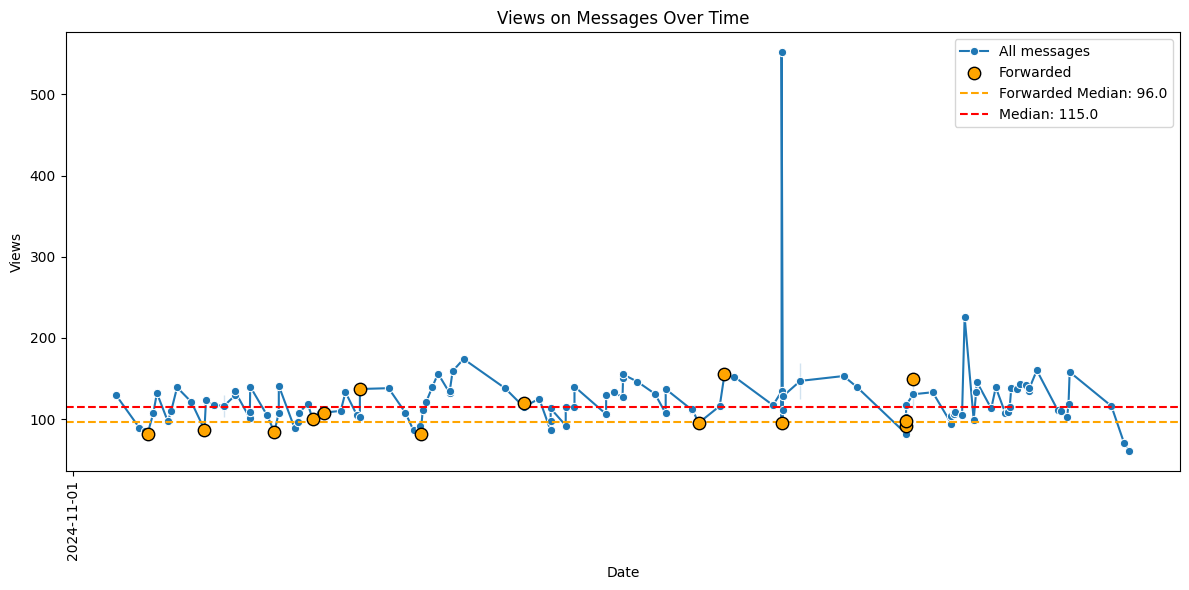

In [16]:
median_views = data['views'].median()
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='views', data=data, marker='o', label='All messages')

# Highlight forwarded messages
forwarded = data[data['is_forwarded']]
plt.scatter(forwarded['date'], forwarded['views'], color='orange', s=80, label='Forwarded', zorder=5, edgecolor='black')

median_forwarded_views = forwarded['views'].median()
plt.axhline(median_forwarded_views, color='orange', linestyle='--', label=f'Forwarded Median: {median_forwarded_views}')

plt.axhline(median_views, color='red', linestyle='--', label=f'Median: {median_views}')
plt.title('Views on Messages Over Time')
plt.xlabel('Date')
plt.ylabel('Views')
plt.xticks(ticks=plt.gca().get_xticks()[::10], rotation=90)
plt.legend()
plt.tight_layout()

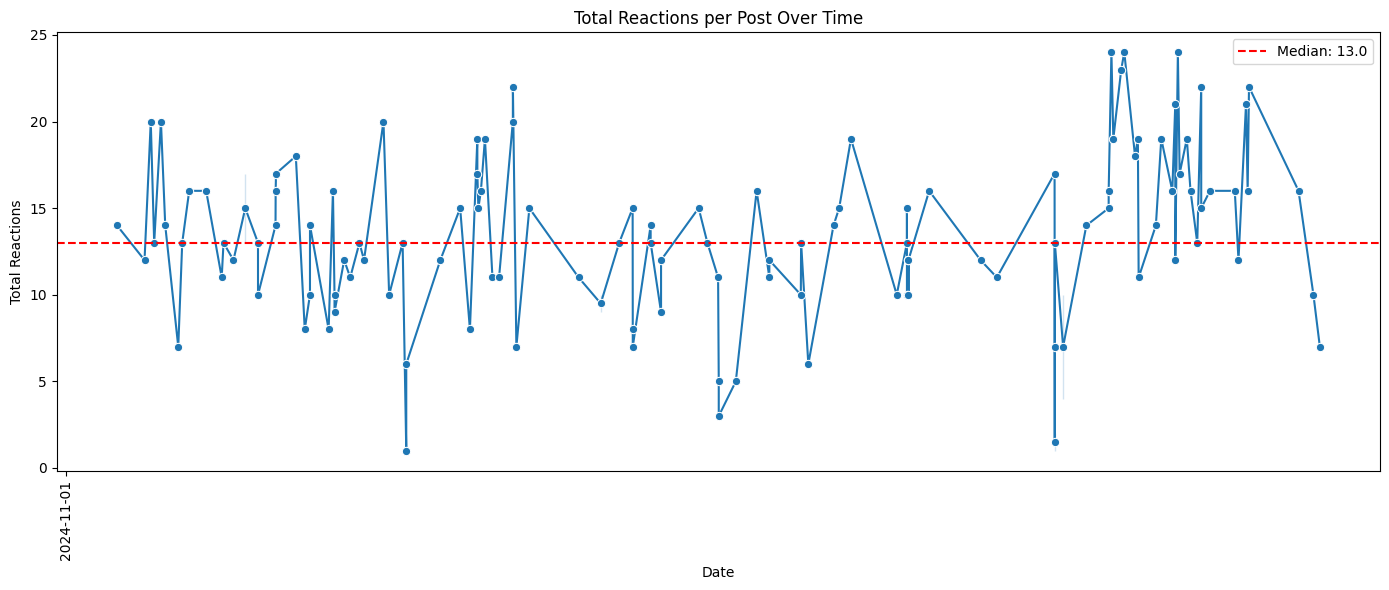

In [17]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='date', y='total_reactions', data=data, marker='o')
median_reactions = data['total_reactions'].median()
plt.axhline(median_reactions, color='red', linestyle='--', label=f'Median: {median_reactions}')
plt.title('Total Reactions per Post Over Time')
plt.xlabel('Date')
plt.ylabel('Total Reactions')
plt.xticks(ticks=plt.gca().get_xticks()[::10], rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# find the message with the highest views
min_reactions = data['total_reactions'].max()
min_reactions_message = data[data['total_reactions'] == min_reactions]
print(f'Message with the least reactions:\n{min_reactions_message}')

Message with the least reactions:
                         date  \
99  2025-08-31 21:43:19+00:00   
102 2025-09-04 15:32:21+00:00   
111 2025-09-20 05:19:59+00:00   

                                                  text  views  \
99   лето выдалось не из лучших😬\nна удивление, жда...    106   
102  - ну дай мне шанс…..\n- так ты же женишься\n- ...    226   
111  друзья спасибо ваши намерения и пожелания спас...    115   

                                                 media  \
99   {'photos': ['"https://cdn4.telesco.pe/file/qp9...   
102  {'photos': ['"https://cdn4.telesco.pe/file/Zim...   
111  {'photos': ['"https://cdn4.telesco.pe/file/usQ...   

                                             reactions  is_forwarded    month  \
99                  {'❤️': 15, '💘': 5, '🍓': 2, '😭': 2}         False  2025-08   
102                         {'❤️': 16, '🍓': 5, '💋': 3}         False  2025-09   
111  {'🥰': 11, '❤️': 6, '🍓': 4, '💋': 1, '🤝': 1, '💊'...         False  2025-09   

     total_rea

# ChatGPT suggested following:

### Numbers that i got:
- Total messages: 127
- total reactions: 1701
- hearts received: 1031
- average reactions per post: 13.3
- most reacted posts are: sss
- the only post that got negative reactions is about september starting
- Number of posts with photos: 87
- Total number of photos shared: 495
- Percentage of messages with photos: 68.50%
- Number of posts with videos: 57
- Total number of videos shared: 152
- Percentage of messages with videos: 44.88%
- Highest viewed post: prep for video about end of college
- Average views per post: 115
- cumulative views: 15524
- Posts forwarded from others: 14
- Busiest posting month: september of 2025 with 19 posts
- Fridays have the most posts: 26
- longest break between posts: between 29th of July and 15th of August
- longest post: 234 words (23.12.2024)
- the most used word is 'и'
- the most used word that is not preposition or pronoun is 'люблю'


In [19]:
# top 50 the most used words in posts
from collections import Counter
import re

all_words = []
for text in data['text'].dropna():
    words = re.findall(r'\b\w+\b', text.lower())
    all_words.extend(words)
word_counts = Counter(all_words)
top_50_words = word_counts.most_common(50)
print('Top 50 most used words in posts:')
for word, count in top_50_words:
    print(f'{word}: {count}')

Top 50 most used words in posts:
и: 109
в: 58
я: 38
что: 37
не: 37
на: 36
с: 27
за: 21
все: 19
по: 18
как: 18
два: 17
это: 17
то: 16
но: 15
из: 15
а: 14
люблю: 14
неделю: 13
мне: 12
потерпеть: 12
экзамена: 12
о: 11
когда: 10
меня: 10
моя: 10
всем: 9
еще: 9
к: 9
так: 9
у: 9
спасибо: 8
всех: 8
p: 8
от: 8
тоже: 8
ну: 8
самая: 8
s: 7
уже: 7
очень: 7
же: 7
которые: 7
со: 7
можно: 7
было: 7
для: 6
день: 6
три: 6
кто: 6


In [20]:
# post with the most words in it
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))
max_word_count = data['word_count'].max()
max_word_message = data[data['word_count'] == max_word_count]
print(f'Message with the most words ({max_word_count} words):\n{max_word_message}')

Message with the most words (234 words):
                        date  \
14 2024-12-23 01:56:57+00:00   

                                                 text  views  \
14  на фотокарточках мне примерно 9-11 лет\nпослед...    130   

                                            media                   reactions  \
14  {'photos': [], 'documents': [], 'videos': []}  {'❤️': 10, '🍓': 4, '🥰': 3}   

    is_forwarded    month  total_reactions  word_count  
14         False  2024-12               17         234  


In [21]:
# top 10 periods with longest breaks between posts in days
data = data.sort_values(by='date')
data['time_diff'] = data['date'].diff().dt.total_seconds() / (24 * 3600)
top_10_breaks = data.nlargest(10, 'time_diff')[['date', 'time_diff']]
print(f'Top 10 longest breaks between posts:\n{top_10_breaks}')

Top 10 longest breaks between posts:
                         date  time_diff
89  2025-08-15 09:07:57+00:00  16.785752
87  2025-07-24 20:58:17+00:00  14.955856
124 2025-10-25 07:22:53+00:00  14.403032
51  2025-03-29 23:49:07+00:00  14.311019
78  2025-06-30 11:50:48+00:00  13.311169
62  2025-05-03 21:03:53+00:00  10.910799
37  2025-02-17 19:01:19+00:00   9.905914
72  2025-06-02 14:24:13+00:00   9.146366
1   2024-11-23 19:01:50+00:00   7.992257
75  2025-06-12 02:32:15+00:00   7.322917


In [22]:
# which day of the week has the highest amount of posts
data['day_of_week'] = data['date'].dt.day_name()
posts_per_day = data['day_of_week'].value_counts()
print(f'Posts per day of the week:\n{posts_per_day}')

Posts per day of the week:
day_of_week
Friday       26
Monday       23
Saturday     22
Thursday     20
Tuesday      14
Wednesday    11
Sunday       11
Name: count, dtype: int64


In [23]:
data['views'].sum()

np.int64(15524)

In [24]:
# percentage of messages with photos and videos
num_messages_with_photos = 87
percentage_with_photos = (num_messages_with_photos / total_messages) * 100
print(f'Percentage of messages with photos: {percentage_with_photos:.2f}%')
num_messages_with_videos = 57
percentage_with_videos = (num_messages_with_videos / total_messages) * 100
print(f'Percentage of messages with videos: {percentage_with_videos:.2f}%')

Percentage of messages with photos: 68.50%
Percentage of messages with videos: 44.88%


In [25]:
data['total_reactions'].sum()

np.int64(1701)

In [26]:
data['total_reactions'].mean()

np.float64(13.393700787401574)

In [27]:
data.iloc[115]

date                                       2025-09-25 20:37:02+00:00
text                                                             NaN
views                                                            142
media              {'photos': ['"https://cdn4.telesco.pe/file/A53...
reactions                          {'❤️': 7, '🤬': 3, '🍓': 2, '💋': 1}
is_forwarded                                                   False
month                                                        2025-09
total_reactions                                                   13
word_count                                                         1
time_diff                                                   1.957326
day_of_week                                                 Thursday
Name: 115, dtype: object

In [28]:
for i in range(126):
    print(data['reactions'][i])

{'❤️': 12, '🍓': 2}
{'❤️': 12}
{'🕊': 13, '❤️': 5, '🔥': 2}
{'❤️': 12, '🕊': 1}
{'❤️': 12, '🥰': 5, '🔥': 3}
{'❤️': 14}
{'❤️': 5, '💅': 1, '💘': 1}
{'❤️': 9, '🕊': 4}
{'❤️': 11, '🍓': 5}
{'💋': 9, '🕊': 5, '❤️': 1, '🍓': 1}
{'🍓': 7, '❤️': 2, '💋': 1, '😭': 1}
{'❤️': 11, '🍓': 2}
{'❤️': 8, '❤️\\u200d🔥': 3, '😭': 1}
{'🥰': 7, '❤️': 4, '🍓': 2}
{'❤️': 10, '🍓': 4, '🥰': 3}
{'❤️\\u200d🔥': 6, '❤️': 4, '🍓': 2, '💘': 1}
{'❤️': 9, '🍓': 1}
{'💘': 9, '❤️': 3, '🍓': 2}
{'❤️': 14, '🍓': 2}
{'❤️': 13, '🕊': 3, '❤️\\u200d🔥': 1}
{'❤️': 12, '💘': 4, '❤️\\u200d🔥': 1, '🍓': 1}
{'🍓': 8}
{'❤️': 9, '💘': 1}
{'❤️': 10, '🍓': 3, '💘': 1}
{'🕊': 8}
{'🍓': 12, '❤️': 4}
{'🍓': 8, '❤️': 1, '🔥': 1}
{'❤️\\u200d🔥': 4, '🍓': 3, '❤️': 2}
{'🍓': 12}
{'🍓': 8, '❤️': 2, '💋': 1}
{'❤️': 9, '🍓': 4}
{'❤️': 9, '💯': 3}
{'❤️': 15, '🍓': 4, '😭': 1}
{'❤️': 7, '🌭': 2, '🍓': 1}
{'❤️': 10, '💋': 3}
{'❤️\\u200d🔥': 1}
{'🌭': 6}
{'❤️': 9, '💋': 3}
{'❤️': 15}
{'💅': 7, '❤️\\u200d🔥': 1}
{'❤️': 15, '🌭': 3, '❤️\\u200d🔥': 1}
{'🔥': 11, '❤️': 4, '❤️\\u200d🔥': 1, '🕊': 1}
{'❤️': 12, '🍓

In [29]:
# Safely convert stringified dicts to real Python dicts
data['media'] = data['media'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Count how many posts contain at least one photo
data['photo_count'] = data['media'].apply(
    lambda m: len(m.get('photos', [])) if isinstance(m, dict) and 'photos' in m else 0
)

# Total number of posts that include photos
photo_posts = (data['photo_count'] > 0).sum()

# Total number of individual photos shared
total_photos = data['photo_count'].sum()

print(f"Number of posts with photos: {photo_posts}")
print(f"Total number of photos shared: {total_photos}")

Number of posts with photos: 87
Total number of photos shared: 495


In [30]:
# Count how many posts contain at least one video
data['video_count'] = data['media'].apply(
    lambda m: len(m.get('videos', [])) if isinstance(m, dict) and 'videos' in m else 0
)

# Total number of posts that include photos
video_posts = (data['video_count'] > 0).sum()

# Total number of individual photos shared
total_video = data['video_count'].sum()

print(f"Number of posts with videos: {video_posts}")
print(f"Total number of videos shared: {total_video}")

Number of posts with videos: 57
Total number of videos shared: 152


In [31]:
# Convert string dicts (if they are strings) into real Python dicts safely
data['reactions'] = data['reactions'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Extract ❤️ count from each reaction dict (0 if not present)
data['hearts'] = data['reactions'].apply(lambda r: r.get('❤️', 0) if isinstance(r, dict) else 0)

# Total hearts received
total_hearts = data['hearts'].sum()
print(f"Total hearts received: {total_hearts}")
# Average hearts per post
avg_hearts = data['hearts'].mean()

# Post with most hearts
top_hearted = data.loc[data['hearts'].idxmax()]

print(f"Average hearts per post: {avg_hearts:.2f}")
print(f"Most hearted post got {top_hearted['hearts']} ❤️s and said:\n{top_hearted['text']}")



Total hearts received: 1031
Average hearts per post: 8.12
Most hearted post got 20 ❤️s and said:
о море


In [33]:
# return how many times every emoji was used in reactions
def count_emojis(reactions_series):
    emoji_counts = {}
    for reactions in reactions_series:
        if isinstance(reactions, dict):
            for emoji, count in reactions.items():
                emoji_counts[emoji] = emoji_counts.get(emoji, 0) + count
    return emoji_counts

emoji_usage = count_emojis(data['reactions'])
sorted_emojis = sorted(emoji_usage.items(), key=lambda x: x[1], reverse=True)
print("Emoji usage counts:")
for emoji, count in sorted_emojis:
    print(f"{emoji}: {count}")

# export to CSV
emoji_df = pd.DataFrame(sorted_emojis, columns=['emoji', 'count'])
emoji_df.to_csv('emoji_usage.csv', index=False, encoding='utf-8-sig')
print("Exported emoji_usage.csv")

Emoji usage counts:
❤️: 1031
🍓: 260
🕊: 63
💘: 61
💋: 59
❤️\u200d🔥: 48
🔥: 32
🥰: 32
🌭: 28
😭: 14
💅: 11
😈: 11
👀: 10
🙏: 7
✍: 6
🏆: 5
🥴: 4
💯: 3
⚡: 3
🤯: 3
🤬: 3
😁: 2
🍾: 1
🍌: 1
🤩: 1
🤝: 1
💊: 1
Exported emoji_usage.csv
